In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [41]:
# Assuming the data is stored in a CSV file named 'company_data.csv'
data = pd.read_csv(r"D:\Documents\Unified Mentor Internship[DA-2M]\Financial Analytics data.csv")

Market Capitalization Summary:
count       365.000000
mean      31300.970301
std       67224.641338
min        3017.070000
25%        5089.870000
50%        9097.330000
75%       21372.180000
max      583436.720000
Name: Mar Cap - Crore, dtype: float64

Quarterly Sales Summary:
count       365.000000
mean       4395.976849
std       11092.206185
min          47.240000
25%         593.740000
50%        1278.300000
75%        2840.750000
max      110666.930000
Name: Sales Qtr - Crore, dtype: float64

Correlation between Market Capitalization and Quarterly Sales: 0.62

Industry-wise Statistics:
          Mar Cap - Crore            Sales Qtr - Crore          
                     mean        sum              mean       sum
Name                                                            
(I)              8984.735   17969.47          5632.960  11265.92
(India)         41215.790   82431.58          7555.095  15110.19
.Hi              4498.090    4498.09          2438.580   2438.58
Advanta    

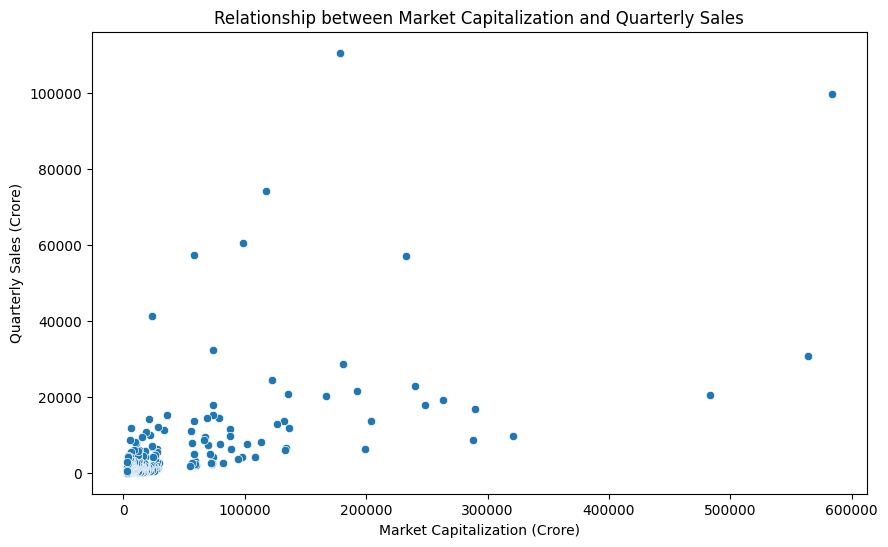


Outliers in Market Capitalization:
             Name  Mar Cap - Crore
0  Reliance Inds.        583436.72
1             TCS        563709.84
2       HDFC Bank        482953.59
3             ITC        320985.27
4         H D F C        289497.37
5  Hind. Unilever        288265.26
6   Maruti Suzuki        263493.81
7         Infosys        248320.35
8         O N G C        239981.50


In [42]:

# Data cleaning
data = data.dropna(subset=['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore'])
data = data[data['Mar Cap - Crore'] > 0]
data = data[data['Sales Qtr - Crore'] > 0]

# Descriptive statistics
print("Market Capitalization Summary:")
print(data['Mar Cap - Crore'].describe())
print("\nQuarterly Sales Summary:")
print(data['Sales Qtr - Crore'].describe())

# Correlation analysis
corr = data['Mar Cap - Crore'].corr(data['Sales Qtr - Crore'])
print(f"\nCorrelation between Market Capitalization and Quarterly Sales: {corr:.2f}")

# Industry analysis
industry_groups = data.groupby(data['Name'].str.split().str[-1])
industry_stats = industry_groups[['Mar Cap - Crore', 'Sales Qtr - Crore']].agg(['mean', 'sum'])
print("\nIndustry-wise Statistics:")
print(industry_stats)

# Market share analysis
data['Market Share'] = data['Mar Cap - Crore'] / data['Mar Cap - Crore'].sum()
top_companies = data.nlargest(10, 'Market Share')
print("\nTop Companies by Market Share:")
print(top_companies[['Name', 'Market Share']])

# Performance metrics
data['P/S Ratio'] = data['Mar Cap - Crore'] / data['Sales Qtr - Crore']
print("\nTop 10 Companies by P/S Ratio:")
print(data.nlargest(10, 'P/S Ratio')[['Name', 'P/S Ratio']])

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=data)
plt.title('Relationship between Market Capitalization and Quarterly Sales')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.show()

# Outlier analysis
z_scores = np.abs((data['Mar Cap - Crore'] - data['Mar Cap - Crore'].mean()) / data['Mar Cap - Crore'].std())
outliers = data[(z_scores > 3)]
print("\nOutliers in Market Capitalization:")
print(outliers[['Name', 'Mar Cap - Crore']])

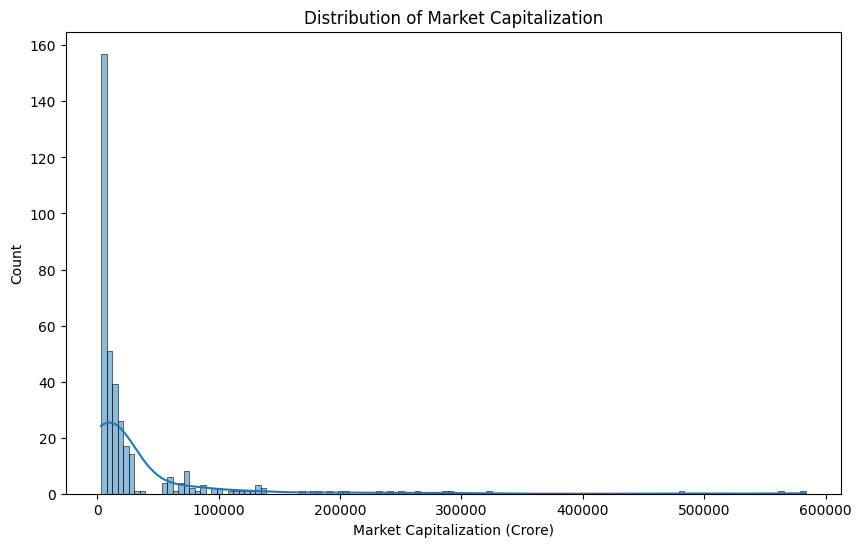

In [43]:
# Market Capitalization Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Mar Cap - Crore'], kde=True)
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Count')
plt.show()

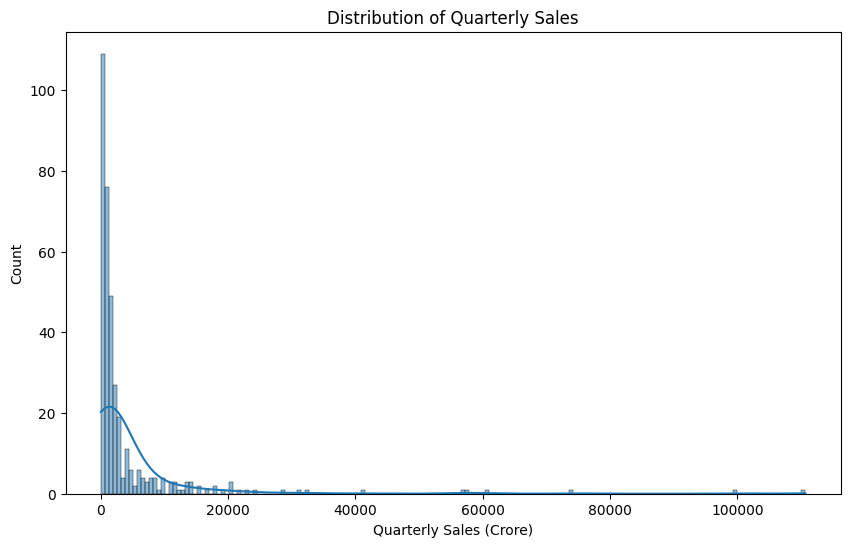

In [44]:
# Quarterly Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales Qtr - Crore'], kde=True)
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Count')
plt.show()

Top 10 Companies by Market Capitalization:
             Name  Mar Cap - Crore
0  Reliance Inds.        583436.72
1             TCS        563709.84
2       HDFC Bank        482953.59
3             ITC        320985.27
4         H D F C        289497.37
5  Hind. Unilever        288265.26
6   Maruti Suzuki        263493.81
7         Infosys        248320.35
8         O N G C        239981.50
9  St Bk of India        232763.33


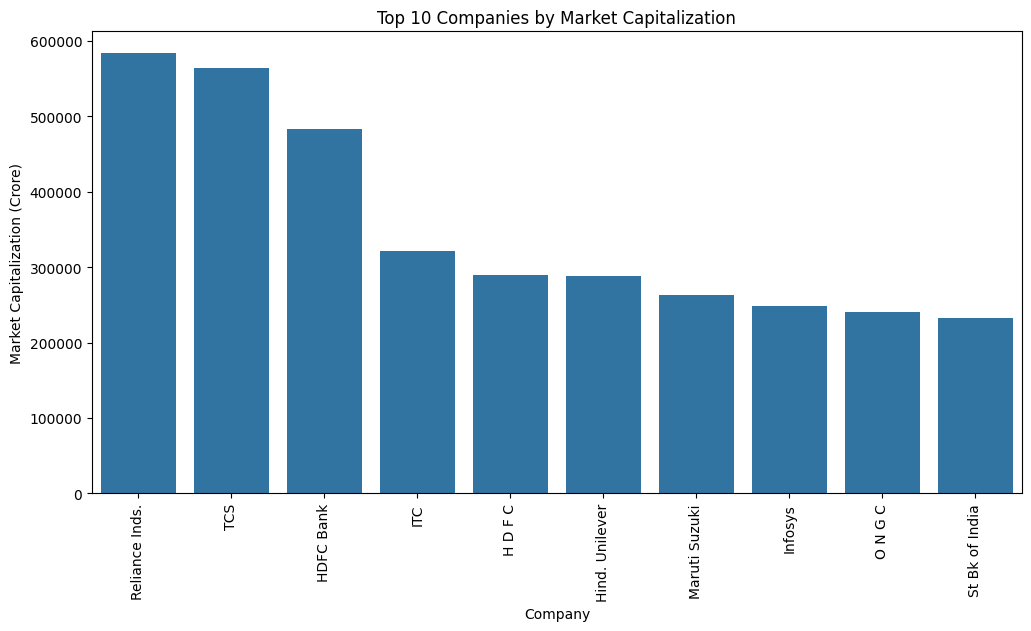

In [47]:
# Top Companies by Market Capitalization
top_market_cap = data.nlargest(10, 'Mar Cap - Crore')[['Name', 'Mar Cap - Crore']]
print("Top 10 Companies by Market Capitalization:")
print(top_market_cap)

# Bar Plot of Top Companies by Market Capitalization
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Mar Cap - Crore', data=top_market_cap)
plt.title('Top 10 Companies by Market Capitalization')
plt.xlabel('Company')
plt.ylabel('Market Capitalization (Crore)')
plt.xticks(rotation=90)
plt.show()

Top 10 Companies by Quarterly Sales:
                Name  Sales Qtr - Crore
14           I O C L          110666.93
0     Reliance Inds.           99810.00
23       Tata Motors           74156.07
27           B P C L           60616.36
54           H P C L           57474.25
9     St Bk of India           57014.08
122   Rajesh Exports           41304.84
40        Tata Steel           32464.14
1                TCS           30904.00
13   Larsen & Toubro           28747.45


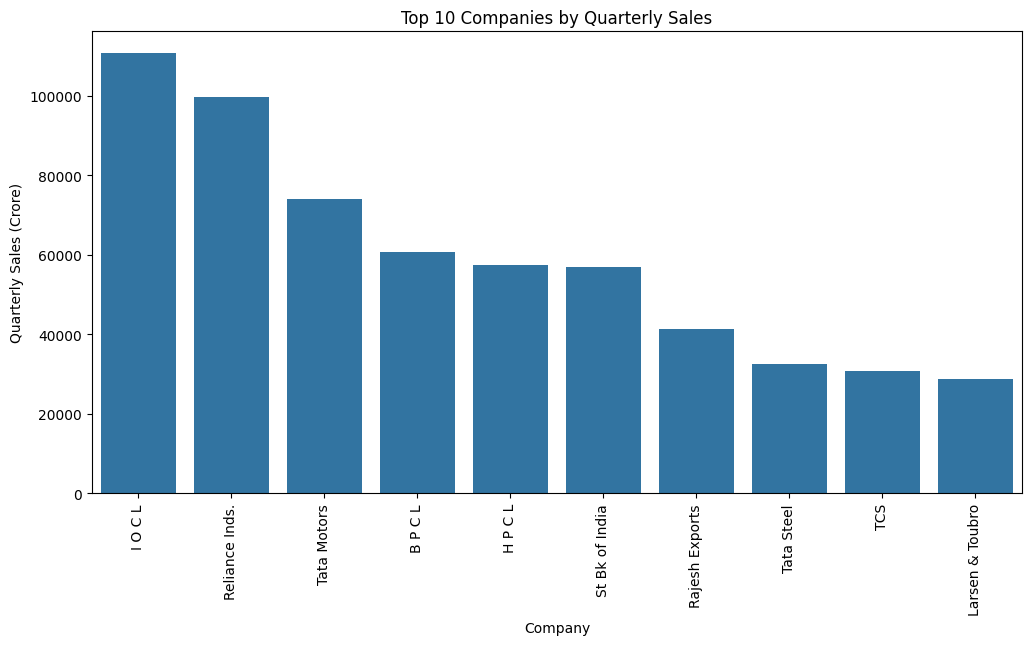

In [48]:
# Top Companies by Quarterly Sales
top_sales = data.nlargest(10, 'Sales Qtr - Crore')[['Name', 'Sales Qtr - Crore']]
print("Top 10 Companies by Quarterly Sales:")
print(top_sales)

# Bar Plot of Top Companies by Quarterly Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Sales Qtr - Crore', data=top_sales)
plt.title('Top 10 Companies by Quarterly Sales')
plt.xlabel('Company')
plt.ylabel('Quarterly Sales (Crore)')
plt.xticks(rotation=90)
plt.show()

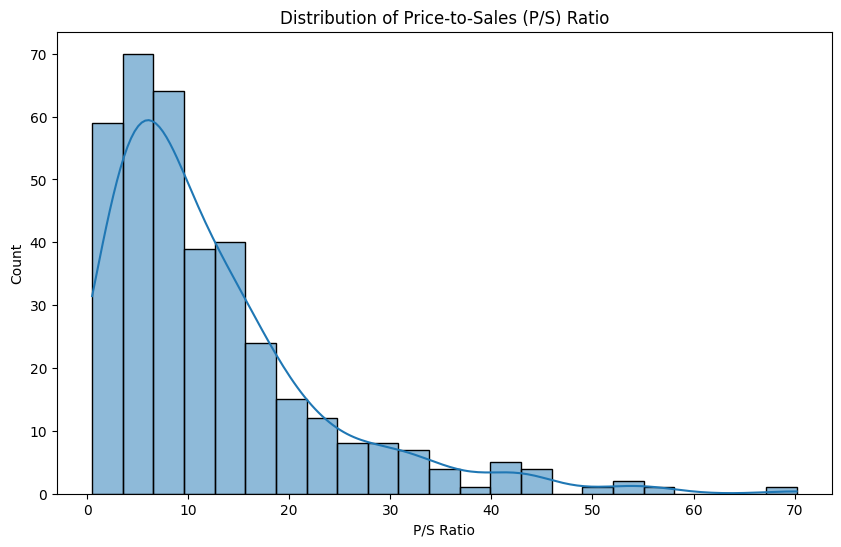

In [49]:
# Price-to-Sales (P/S) Ratio Distribution
data['P/S Ratio'] = data['Mar Cap - Crore'] / data['Sales Qtr - Crore']
plt.figure(figsize=(10, 6))
sns.histplot(data['P/S Ratio'], kde=True)
plt.title('Distribution of Price-to-Sales (P/S) Ratio')
plt.xlabel('P/S Ratio')
plt.ylabel('Count')
plt.show()

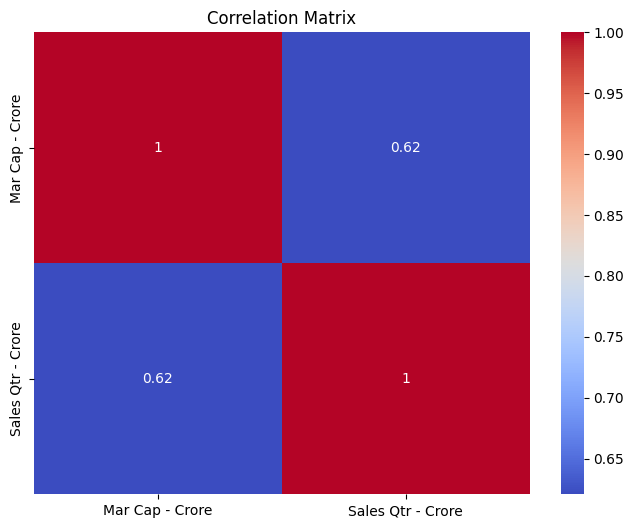

In [50]:
# Correlation Matrix
corr_matrix = data[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

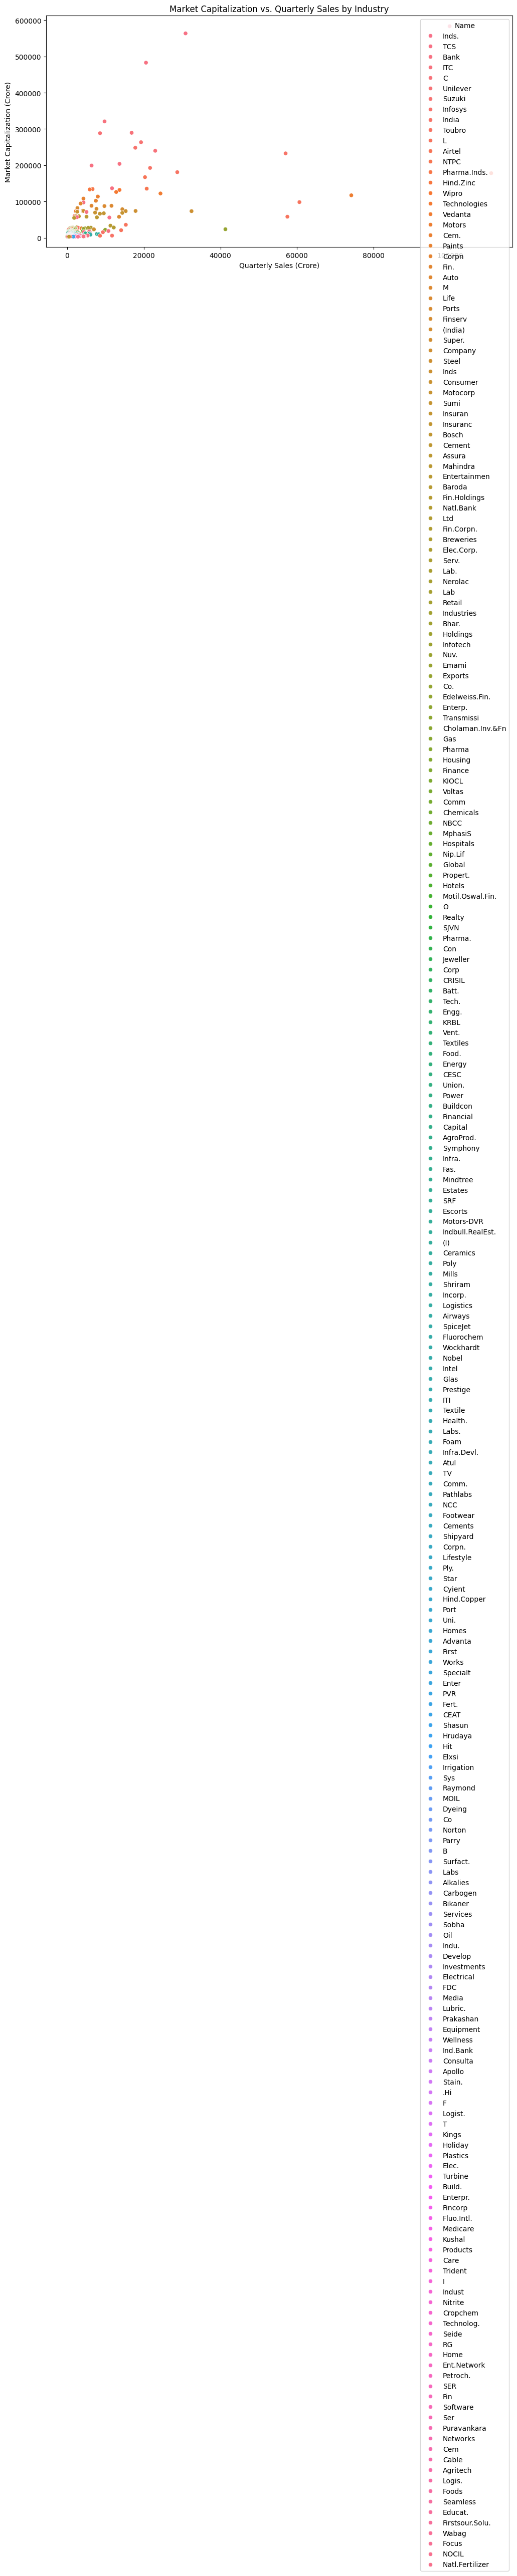

In [51]:
# Market Capitalization vs. Quarterly Sales by Industry
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sales Qtr - Crore', y='Mar Cap - Crore', data=data, hue=data['Name'].str.split().str[-1])
plt.title('Market Capitalization vs. Quarterly Sales by Industry')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Market Capitalization (Crore)')
plt.show()

Count of Companies by Company Size:
Company Size
Small         92
Medium        91
Large         91
Very Large    91
Name: count, dtype: int64


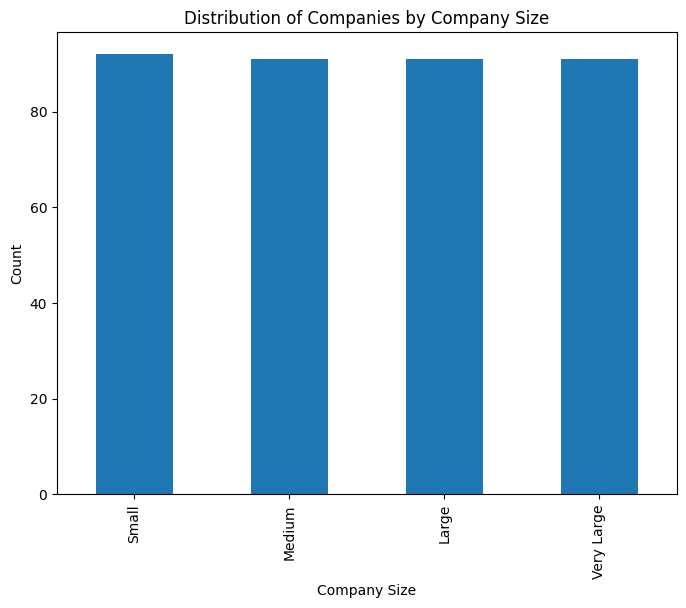

In [54]:
# Define company size based on market capitalization
data['Company Size'] = pd.qcut(data['Mar Cap - Crore'], q=4, labels=['Small', 'Medium', 'Large', 'Very Large'])

# Count of companies by company size
company_size_count = data['Company Size'].value_counts()
print("Count of Companies by Company Size:")
print(company_size_count)

# Visualize company size distribution
plt.figure(figsize=(8, 6))
company_size_count.plot(kind='bar')
plt.title('Distribution of Companies by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()